<a href="https://colab.research.google.com/github/Sajin1354/Spam-and-Phishing-Detection/blob/main/EDUNET_final_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



=== TRAINING SPAM CLASSIFIER ===

=== TRAINING PHISHING CLASSIFIER ===

=== SAMPLE TEST CASES ===
Message: 'Congratulations! You've won a free ticket. Call now!' ➤ Prediction: HAM
Message: 'Hey, are we still meeting today?' ➤ Prediction: HAM

Phishing Sample ➤ Prediction: LEGIT


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


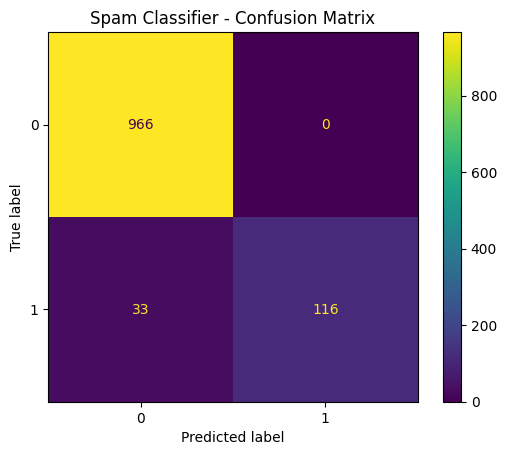

📧 Spam Classifier Accuracy: 0.97


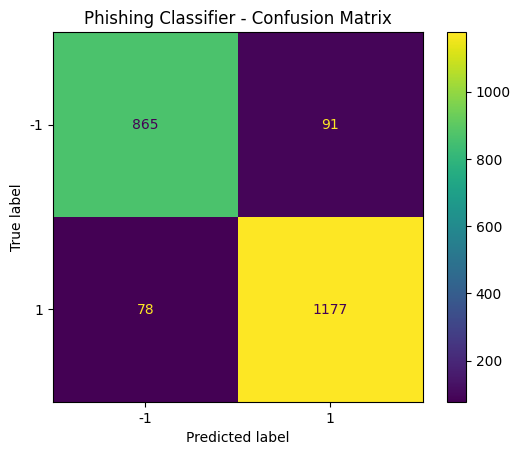

🎣 Phishing Classifier Accuracy: 0.92


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


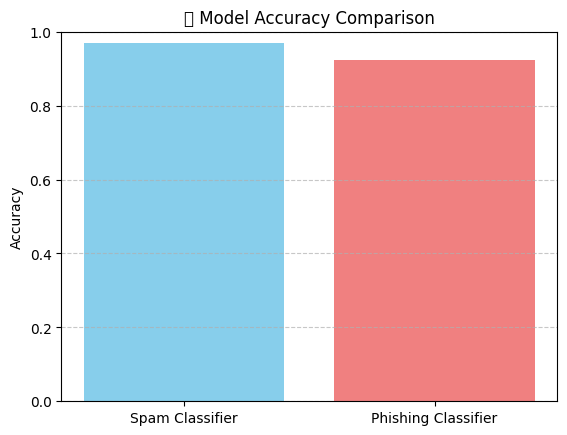

In [ ]:
import pandas as pd
import numpy as np
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score

nltk.download('stopwords')

# --------------------- SPAM CLASSIFIER ---------------------
print("\n=== TRAINING SPAM CLASSIFIER ===")
# Load SMS spam dataset
spam_df = pd.read_csv("https://raw.githubusercontent.com/justmarkham/pycon-2016-tutorial/master/data/sms.tsv", sep='\t', names=['label', 'message'])
spam_df['label_num'] = spam_df.label.map({'ham': 0, 'spam': 1})

# Text preprocessing
def clean_text(text):
    text = text.lower()
    text = ''.join([c for c in text if c not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

spam_df['cleaned_message'] = spam_df['message'].apply(clean_text)

# TF-IDF vectorization
spam_vectorizer = TfidfVectorizer()
X_spam = spam_vectorizer.fit_transform(spam_df['cleaned_message'])
y_spam = spam_df['label_num']

# Train-test split and model training
X_train_spam, X_test_spam, y_train_spam, y_test_spam = train_test_split(X_spam, y_spam, test_size=0.2, random_state=42)
spam_model = MultinomialNB()
spam_model.fit(X_train_spam, y_train_spam)

# --------------------- PHISHING CLASSIFIER ---------------------
print("\n=== TRAINING PHISHING CLASSIFIER ===")
# Load phishing dataset
phish_df = pd.read_csv("https://raw.githubusercontent.com/saksh01mino/Phishing-Website-Detection-using-Machine-Learning-Models/main/dataset/dataset.csv")

# Fill NaN values with 0
phish_df.fillna(0, inplace=True)

X_phish = phish_df.drop('Result', axis=1)
y_phish = phish_df['Result']


# Train-test split and model training
X_train_phish, X_test_phish, y_train_phish, y_test_phish = train_test_split(X_phish, y_phish, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler

# Step 1: Scale the features
scaler = StandardScaler()
X_train_phish = scaler.fit_transform(X_train_phish)
X_test_phish = scaler.transform(X_test_phish)

# Step 2: Increase max_iter
phish_model = LogisticRegression(max_iter=5000)  # or even 10000 if needed
phish_model.fit(X_train_phish, y_train_phish)


# --------------------- PREDICTION FUNCTIONS ---------------------
def predict_spam(message):
    msg_clean = clean_text(message)
    vec_msg = spam_vectorizer.transform([msg_clean])
    prediction = spam_model.predict(vec_msg)[0]
    return "SPAM" if prediction == 1 else "HAM"

def predict_phishing(sample_features):
    sample_df = pd.DataFrame([sample_features])
    prediction = phish_model.predict(sample_df)[0]
    return "PHISHING" if prediction == 1 else "LEGIT"

# --------------------- TESTING BOTH MODELS ---------------------
print("\n=== SAMPLE TEST CASES ===")
# Test spam
msg1 = "Congratulations! You've won a free ticket. Call now!"
print(f"Message: '{msg1}' ➤ Prediction: {predict_spam(msg1)}")

msg2 = "Hey, are we still meeting today?"
print(f"Message: '{msg2}' ➤ Prediction: {predict_spam(msg2)}")

# Test phishing with one row from dataset
sample = X_phish.iloc[0].to_dict()
print("\nPhishing Sample ➤ Prediction:", predict_phishing(sample))



# ===================== SPAM CLASSIFIER RESULTS =====================
# Predict
y_pred_spam = spam_model.predict(X_test_spam)
accuracy_spam = accuracy_score(y_test_spam, y_pred_spam)

# Confusion Matrix for Spam
cm_spam = confusion_matrix(y_test_spam, y_pred_spam)
disp_spam = ConfusionMatrixDisplay(confusion_matrix=cm_spam, display_labels=spam_model.classes_)
disp_spam.plot()
plt.title("Spam Classifier - Confusion Matrix")
plt.show()

print(f"📧 Spam Classifier Accuracy: {accuracy_spam:.2f}")


# ===================== PHISHING CLASSIFIER RESULTS =====================
# Predict
y_pred_phish = phish_model.predict(X_test_phish)
accuracy_phish = accuracy_score(y_test_phish, y_pred_phish)

# Confusion Matrix for Phishing
cm_phish = confusion_matrix(y_test_phish, y_pred_phish)
disp_phish = ConfusionMatrixDisplay(confusion_matrix=cm_phish, display_labels=phish_model.classes_)
disp_phish.plot()
plt.title("Phishing Classifier - Confusion Matrix")
plt.show()

print(f"🎣 Phishing Classifier Accuracy: {accuracy_phish:.2f}")


# ===================== COMPARATIVE ACCURACY BAR CHART =====================
plt.bar(['Spam Classifier', 'Phishing Classifier'],
        [accuracy_spam, accuracy_phish],
        color=['skyblue', 'lightcoral'])
plt.ylabel('Accuracy')
plt.title('📊 Model Accuracy Comparison')
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()